In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()


In [3]:
x = data.data
y = data.target


In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [5]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [6]:
print(lr.coef_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]


In [7]:
print(lr.intercept_)

152.13623331746496


In [8]:
y_pred = lr.predict(x_test)

In [9]:
from sklearn.metrics import r2_score,mean_squared_error

print('R2 score ',r2_score(y_test,y_pred))
print('RMSE ',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score  0.5188113124539249
RMSE  48.72713760953253


In [17]:
from sklearn.linear_model import Ridge 
R = Ridge(alpha = 0.01)

In [18]:
R.fit(x_train,y_train)

Ridge(alpha=0.01)

In [19]:
print(R.coef_)
print(R.intercept_)

[  26.26181052 -240.39934227  496.57507972  326.6599829  -420.98179086
  137.89180358  -53.05692237  194.22314385  581.45028172   94.31369289]
152.08329034119228


In [20]:
y_pred1=R.predict(x_test)
print('r2_score', r2_score(y_test,y_pred1))
print('RSME' ,np.sqrt(mean_squared_error(y_test,y_pred1)))

r2_score 0.5230847087541542
RSME 48.510284264409194


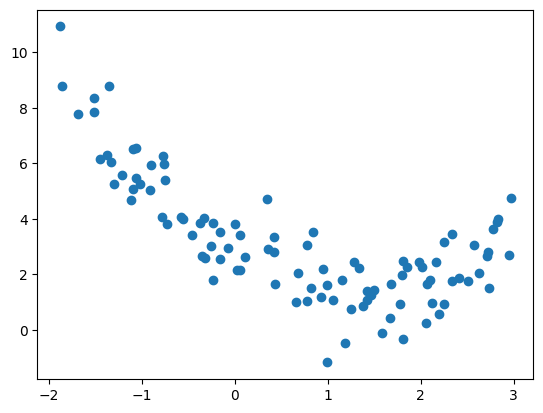

In [10]:
m = 100
x1 = 5 * np.random.rand(m,1) - 2
x2 = 0.7 * x1**2 -2 * x1 + 3 + np.random.randn(m,1)

plt.scatter(x1,x2)
plt.show()

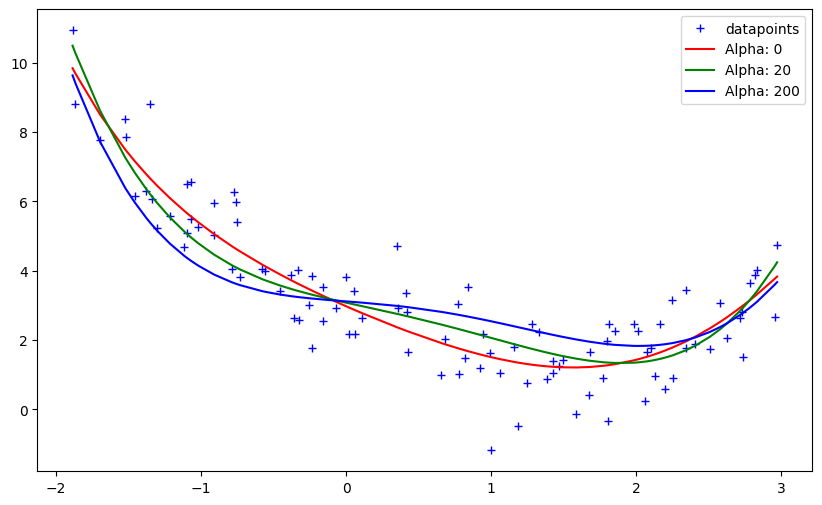

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_pred_ridge (x1 ,x2 ,alpha):
    model=make_pipeline(PolynomialFeatures(degree = 5 ),Ridge(alpha = alpha))
    model.fit(x1,x2)
    return model.predict(x1)

alphas = [0,20,200]
cs = ['r' , 'g' , 'b']
plt.figure(figsize = (10,6))
plt.plot( x1 ,x2 ,'b+' , label = "datapoints")

#Loop Through Each Alpha and Plot
for alpha , c in zip(alphas, cs):
    preds = get_pred_ridge(x1 , x2, alpha)
    # plot 
    plt.plot(sorted(x1[:,0]) , preds[np.argsort(x1[:,0])], c ,label ='Alpha: {}'.format(alpha))
plt.legend()
plt.show()
    